In [8]:
# Importação das bibliotecas
import cv2
import matplotlib.pyplot as plt
import easyocr


In [10]:
# Carregamento da imagem
image_path = 'FFVI\\Dialog\\options.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Template matching para localizar a seta
template_path = 'FFVI\\Dialog\\pointer.jpg'
template = cv2.imread(template_path, 0)

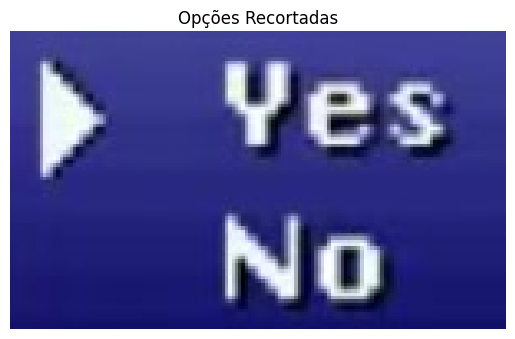

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Texto: Yes, Confiança: 0.9993806648875428
Texto: No, Confiança: 0.9982409068779112


In [19]:
res = cv2.matchTemplate(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# Salvar as coordenadas da seta
top_left = max_loc
h, w = template.shape
bottom_right = (top_left[0] + w, top_left[1] + h)

# Definir a área de recorte com base nas coordenadas da seta
offset_x = 0  # Ajustar conforme necessário
offset_y = 0  # Ajustar conforme necessário
width = 150    # Ajustar conforme necessário
height = 90   # Ajustar conforme necessário

crop_top_left = (top_left[0] + offset_x, top_left[1] + offset_y)
crop_bottom_right = (crop_top_left[0] + width, crop_top_left[1] + height)

# Recortar a área das opções
cropped_options = image[crop_top_left[1]:crop_bottom_right[1], crop_top_left[0]:crop_bottom_right[0]]

# Exibir a imagem recortada
plt.imshow(cv2.cvtColor(cropped_options, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Opções Recortadas')
plt.show()

# Aplicar OCR na imagem recortada das opções
reader = easyocr.Reader(['pt'])
result = reader.readtext(cropped_options)

# Imprimir os resultados
for (bbox, text, prob) in result:
    print(f'Texto: {text}, Confiança: {prob}')
